In [1]:
from sklearn.datasets import make_classification



In [2]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)


In [3]:
X.shape


(1000, 5)

In [4]:
Y.shape


(1000,)

In [ ]:
Lets do some 80/20 datasplit

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [7]:
X_train.shape, Y_train.shape


((800, 5), (800,))

In [8]:
X_test.shape, Y_test.shape


((200, 5), (200,))

In [ ]:
Lets make a clasification model , first the imports.

In [9]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [ ]:
After we define the classifiers

In [10]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]


In [11]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)


In [12]:
scores

[0.855,
 0.86,
 0.835,
 0.825,
 0.85,
 0.85,
 0.85,
 0.835,
 0.865,
 0.865,
 0.83,
 0.865,
 0.85,
 0.855]

In [16]:
import pandas as pd
import seaborn as sns

In [ ]:
Making the dataframe

In [17]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.855
1,Linear_SVM,0.860
2,Polynomial_SVM,0.835
3,RBF_SVM,0.825
4,Gaussian_Process,0.850
5,Gradient_Boosting,0.850
6,Decision_Tree,0.850
7,Extra_Trees,0.835
8,Random_Forest,0.865
9,Neural_Net,0.865


In [ ]:
Bar plot of the result using seaborn

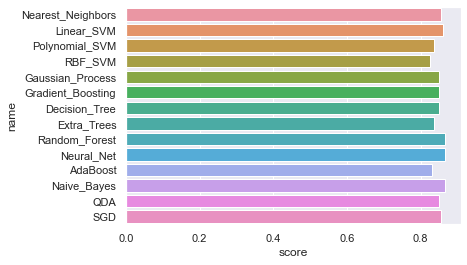

In [19]:
sns.set(style="darkgrid")
ax = sns.barplot(y="name", x="score", data=df)